In [102]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [103]:
def make_dataset(number_of_data):
    # making a 2-d dataset
    data_points = []
    for _ in range(number_of_data):
        x = np.random.uniform(low=0, high=1)
        y = np.random.uniform(low=0, high=1)
        data_points.append([x, y])
    data_points = np.array(data_points)
    return data_points

In [104]:
def training_test_split(data, percentage_of_test_data):
    total_data = len(data)
    split_index = [round(total_data*(1-percentage_of_test_data))]
    sub_arrays = np.split(data, split_index)
    return sub_arrays[0], sub_arrays[1]

In [105]:
class KMeans:
    iterations = 0
    current_cost = 0
    epsilon = 0
    number_of_clusters = 0

    cluster_centroids = None # the points of the cluster centroids
    data = None # actual data points
    current_inclusion = None # the current centroid of the i-th data point
    history = None # number_of_iteration, cost

    def __init__(self, k):
        self.number_of_clusters = k

    def initiate_centroids(self):
        random_indices = np.random.choice(self.data.shape[0], self.number_of_clusters, replace=False)
        self.cluster_centroids = self.data[random_indices]

    def calculate_distance(self, point1, point2):
        result = 0
        for i in range(point1.shape[0]):
            result += pow((point1[i]-point2[i]), 2)
        result = math.sqrt(result)
        return result

    def update_points(self):
        for i in range(self.data.shape[0]):
            curr_point = self.data[i]
            min_dist = math.inf
            index = -1
            for j in range(self.number_of_clusters):
                curr_cluster_centroid = self.cluster_centroids[j]
                temp_dist = self.calculate_distance(curr_point, curr_cluster_centroid)
                if temp_dist < min_dist:
                    min_dist = temp_dist
                    index = j
            self.current_inclusion[i] = index

    def fit(self, data, epsilon=0.0001):
        self.data = data
        self.current_inclusion = np.full(self.data.shape[0], -1)
        self.history = {}
        self.iterations = 0
        self.current_cost = 0
        self.epsilon = epsilon
        self.initiate_centroids()

        while(self.iterations<=1 or abs(self.history[self.iterations-1] - self.current_cost) >= self.epsilon):
            self.update_points()
            temp_cost = self.calculate_cost()
            self.iterations += 1
            self.history[self.iterations] = temp_cost
            self.current_cost = temp_cost
            self.update_centroids()
            if self.iterations % 100 == 0:
                print(f"iteration: {self.iterations} : cost: {self.current_cost}")

        print(f"model training is successful")
        return {'history': self.history, 'centroids': self.cluster_centroids}

    def update_centroids(self):
        for i in range(self.number_of_clusters):
            count = 0
            c_sum = np.full(self.data.shape[1], 0)
            for j in range(self.data.shape[0]):
                if self.current_inclusion[j] == i:
                    c_sum = c_sum + self.data[j]
                    count += 1
            c_sum = c_sum / count
            self.cluster_centroids[i] = c_sum

    def calculate_cost(self):
        total_cost = 0
        for index in range(self.current_inclusion.shape[0]):
            point_index = index
            cluster_index = self.current_inclusion[index]
            total_cost += self.calculate_distance(self.data[point_index], self.cluster_centroids[cluster_index])
        m = self.current_inclusion.shape[0]
        total_cost = total_cost / m
        return total_cost

    def predict(self, data):
        predictions = np.full(data.shape[0], -1)
        for i in range(data.shape[0]):
            curr_data = data[i]
            min_dist = math.inf
            index = -1
            for j in range(self.number_of_clusters):
                curr_cluster_centroid = self.cluster_centroids[j]
                temp_dist = self.calculate_distance(curr_data, curr_cluster_centroid)
                if temp_dist < min_dist:
                    min_dist = temp_dist
                    index = j
            predictions[i] = index
        return predictions

In [106]:
data = make_dataset(100)

In [107]:
train_data, test_data = training_test_split(data, 0.1)

In [115]:
model = KMeans(4)
history = model.fit(train_data)

model training is successful


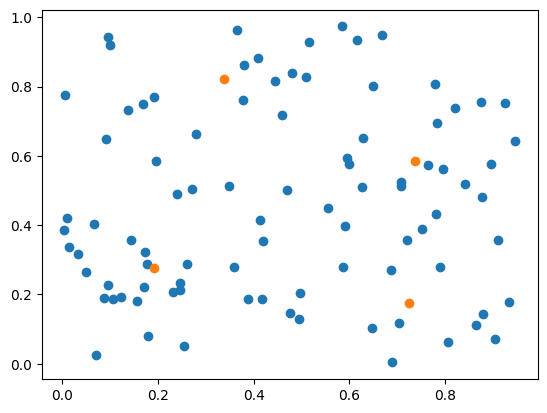

In [116]:
plt.scatter(train_data[:, 0], train_data[:, 1])
plt.scatter(history['centroids'][:, 0], history['centroids'][:, 1])

In [117]:
predictions = model.predict(test_data)

In [118]:
predictions

array([0, 0, 0, 1, 3, 3, 3, 0, 1, 0])